# **IMPORTACIÓN DE DATOS**

---



## **I. IMPORTAR LIBRERIAS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import seaborn as sns
from seaborn import load_dataset

## **II.CARGAR DATASET**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
dataset= pd.read_csv("gdrive/MyDrive/DATA/PM2.5/PRSA_data_2010.1.1-2014.12.31.csv", engine='python')

## **III.DESPLEGAR INFORMACION DATASET**

In [ ]:
dataset.info()
print("\n")
print("Database size:",dataset.shape)

In [ ]:
print(dataset.dtypes)

In [ ]:
dataset.describe()

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

# **ACTIVIDADES**

---



## 1. Consideraciones sobre índices




Teniendo en cuenta la información del dataset, se considera pertintente para el análisis mantener las variables de: 

| Columna   | descripción                  |
| :----:    |            :----:            |
|year:      | Año de registro              |
|month:     | Mes de registro              |  
|day:       | Día de registro              |  
|hour:      | Hora de registro             |   
|pm2.5:     | Concentración de PM2.5       |
|TEMP:      | Temperatura (â„ƒ)            |   
|cbwd:      | Direccion Combinada Viento   |     




Los anteriores índices se hallan pertinentes pues, con ellos se pueden establecer "períodos críticos" de pm2.5 concentrado en la ciudad. e.g.: &nbsp;

**a) Incremento del indice pm2.5 en horas pico.**&nbsp;

**b) Relación de la concentración de material particulado con fenómenos climáticos estacionales (pm2.5 vs. TEMP).** &nbsp;


Al carecer de coordenadas geográficas exactas, se puede pronosticar **c)qué zona de la ciudad podría verse más afectada por la acumulación del mp2.5**, teniendo en cuenta la dirección combinada del viento (cbwd).


### **Seleccionar subconjunto de columnas**

In [11]:
dataset.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

### *Drop* Variables no usables

In [12]:
no_use = dataset.drop(['No','DEWP','PRES','Iws','Is','Ir'], axis=1, inplace=False)
print (no_use)

       year  month  day  hour  pm2.5  TEMP cbwd
0      2010      1    1     0    NaN -11.0   NW
1      2010      1    1     1    NaN -12.0   NW
2      2010      1    1     2    NaN -11.0   NW
3      2010      1    1     3    NaN -14.0   NW
4      2010      1    1     4    NaN -12.0   NW
...     ...    ...  ...   ...    ...   ...  ...
43819  2014     12   31    19    8.0  -2.0   NW
43820  2014     12   31    20   10.0  -3.0   NW
43821  2014     12   31    21   10.0  -3.0   NW
43822  2014     12   31    22    8.0  -4.0   NW
43823  2014     12   31    23   12.0  -3.0   NW

[43824 rows x 7 columns]


### Convertir ***Fecha*** en única variable

In [13]:
date = no_use[["year","month","day","hour"]]
print(date)
print (type(date))

       year  month  day  hour
0      2010      1    1     0
1      2010      1    1     1
2      2010      1    1     2
3      2010      1    1     3
4      2010      1    1     4
...     ...    ...  ...   ...
43819  2014     12   31    19
43820  2014     12   31    20
43821  2014     12   31    21
43822  2014     12   31    22
43823  2014     12   31    23

[43824 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [14]:
no_use["date"]=pd.to_datetime(date)

In [15]:
#no_use["date"]=no_use["date"].astype(np.int64)

In [16]:
#no_use.head()

## 2. Eliminar registros NA en pm2.5

In [ ]:
not_na = no_use[no_use["pm2.5"].notna()]
print (not_na.shape)
print (dataset.shape)

In [ ]:
no_use.dropna(subset=['pm2.5'], axis=0, inplace=False)

## 3.a. Variables x Año

In [22]:
diez = (not_na['year']==2010)
once = (not_na['year']==2011)
doce = (not_na['year']==2012)
trece = (not_na['year']==2013)
catorce = (not_na['year']==2014)

In [23]:
not_na[diez].describe()

,year,month,day,hour,pm2.5,TEMP
count,8091.0,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000
mean,2010.0,6.494747,15.590656,11.493511,104.045730,11.313805
std,0.0,3.480238,8.680500,6.935037,92.281185,12.684701
min,2010.0,1.000000,1.000000,0.000000,1.000000,-19.000000
25%,2010.0,3.000000,8.000000,5.000000,35.000000,0.000000
50%,2010.0,6.000000,16.000000,12.000000,79.000000,11.000000
75%,2010.0,10.000000,23.000000,18.000000,147.000000,23.000000
max,2010.0,12.000000,31.000000,23.000000,980.000000,41.000000


In [24]:
not_na[once].describe()

,year,month,day,hour,pm2.5,TEMP
count,8032.0,8032.000000,8032.000000,8032.000000,8032.000000,8032.000000
mean,2011.0,6.601096,15.966633,11.509836,99.071340,12.407869
std,0.0,3.477195,8.739076,6.910975,92.967298,12.095837
min,2011.0,1.000000,1.000000,0.000000,2.000000,-15.000000
25%,2011.0,4.000000,9.000000,6.000000,27.000000,2.000000
50%,2011.0,7.000000,16.000000,12.000000,71.000000,14.000000
75%,2011.0,10.000000,24.000000,17.000000,139.000000,23.000000
max,2011.0,12.000000,31.000000,23.000000,595.000000,36.000000


In [25]:
not_na[doce].describe()

,year,month,day,hour,pm2.5,TEMP
count,8295.0,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000
mean,2012.0,6.452200,15.471248,11.506088,90.545871,12.109946
std,0.0,3.425475,8.871717,6.927641,81.745087,12.339970
min,2012.0,1.000000,1.000000,0.000000,0.000000,-17.000000
25%,2012.0,3.000000,8.000000,5.000000,25.000000,1.000000
50%,2012.0,6.000000,15.000000,12.000000,69.000000,14.000000
75%,2012.0,9.000000,23.000000,18.000000,132.000000,23.000000
max,2012.0,12.000000,31.000000,23.000000,994.000000,38.000000


In [26]:
not_na[trece].describe()

,year,month,day,hour,pm2.5,TEMP
count,8678.0,8678.000000,8678.000000,8678.000000,8678.000000,8678.000000
mean,2013.0,6.517516,15.674464,11.497580,101.712376,12.383614
std,0.0,3.446639,8.797737,6.927949,98.070477,12.033222
min,2013.0,1.000000,1.000000,0.000000,2.000000,-17.000000
25%,2013.0,4.000000,8.000000,5.000000,32.000000,2.000000
50%,2013.0,7.000000,16.000000,11.000000,71.500000,13.000000
75%,2013.0,10.000000,23.000000,18.000000,138.000000,23.000000
max,2013.0,12.000000,31.000000,23.000000,886.000000,38.000000


In [27]:
not_na[catorce].describe()

,year,month,day,hour,pm2.5,TEMP
count,8661.0,8661.000000,8661.000000,8661.000000,8661.000000,8661.000000
mean,2014.0,6.505715,15.729708,11.504676,97.734557,13.709156
std,0.0,3.442517,8.825550,6.923977,93.531528,11.616259
min,2014.0,1.000000,1.000000,0.000000,2.000000,-13.000000
25%,2014.0,4.000000,8.000000,6.000000,28.000000,3.000000
50%,2014.0,7.000000,16.000000,12.000000,72.000000,15.000000
75%,2014.0,9.000000,23.000000,18.000000,133.000000,23.000000
max,2014.0,12.000000,31.000000,23.000000,671.000000,42.000000


## 3.b. Gráfico Variación **pm2.5** *v.s.* **año**

In [28]:
X=not_na['year']
Y=not_na['pm2.5'].values
Z=not_na['TEMP'].values

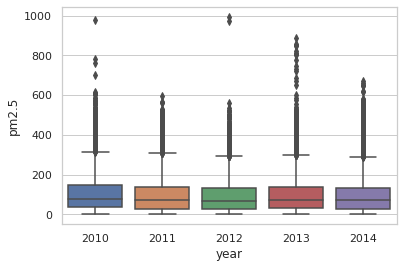

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=not_na["year"], y=not_na["pm2.5"])

> Podemos inferir que la Cantidad Anual Concentrada de pm2.5 en la ciudad de Beijing oscila entre los 90 y 105 $ug/m^3$ promedio registro. Siendo el año 2012 el caso con menos unidades concentradas promedio (90.545871	 $ug/m^3$)


## 4. Gráfico de disperción **TEMP** *v.s.* **PM2.5**

In [30]:
colores=['blue','red','orange']
tamanios=[30,60]

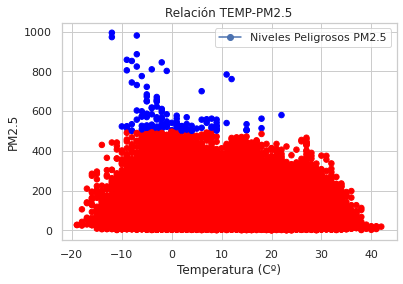

In [52]:
asignar=[]
lista1=[]
lista2=[]
for index, row in not_na.iterrows():
    if(row['pm2.5'] >500) :
        asignar.append(colores[0])
        lista1.append
    else:
        asignar.append(colores[1])
        lista2.append

plt.scatter(Z, Y, c=asignar, s=tamanios[0])
plt.title('Relación TEMP-PM2.5')
plt.xlabel('Temperatura (Cº)')
plt.ylabel('PM2.5')
plt.plot(lista1, label = "Niveles Peligrosos PM2.5", marker = 'o')
plt.legend()
plt.show()

>En la ciudad de Beijing, existe una tendencia a concentrar unidades de PM2.5 mayores al permitido por el Indice de Calidad de Aire de los Estados Unidos (U.S. AQI) en temperaturas $-0^{\circ}$C 

## 5. Cálculo PM2.5 > 120

In [44]:
elevated=not_na[not_na['pm2.5'] > 120]

In [45]:
elevated

,year,month,day,hour,pm2.5,TEMP,cbwd,date
24,2010,1,2,0,129.0,-4.0,SE,2010-01-02 00:00:00
25,2010,1,2,1,148.0,-4.0,SE,2010-01-02 01:00:00
26,2010,1,2,2,159.0,-5.0,SE,2010-01-02 02:00:00
27,2010,1,2,3,181.0,-5.0,SE,2010-01-02 03:00:00
28,2010,1,2,4,138.0,-5.0,SE,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...
43763,2014,12,29,11,134.0,5.0,cv,2014-12-29 11:00:00
43773,2014,12,29,21,128.0,0.0,cv,2014-12-29 21:00:00
43774,2014,12,29,22,164.0,-3.0,NE,2014-12-29 22:00:00
43775,2014,12,29,23,159.0,-3.0,NW,2014-12-29 23:00:00


In [46]:
elevated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12483 entries, 24 to 43776
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    12483 non-null  int64         
 1   month   12483 non-null  int64         
 2   day     12483 non-null  int64         
 3   hour    12483 non-null  int64         
 4   pm2.5   12483 non-null  float64       
 5   TEMP    12483 non-null  float64       
 6   cbwd    12483 non-null  object        
 7   date    12483 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 877.7+ KB


In [ ]:
elevated.count()

In [50]:
print("La probabilidad PM2.5 > 120 es de:", elevated['pm2.5'].count()/not_na['pm2.5'].count()*100, "%")

La probabilidad PM2.5 > 120 es de: 29.894388964724477 %


La probabilidad de encontrar en la base de datos un PM2.5 encima de 120 es de **29.894388964724477%**

### PRUEBA

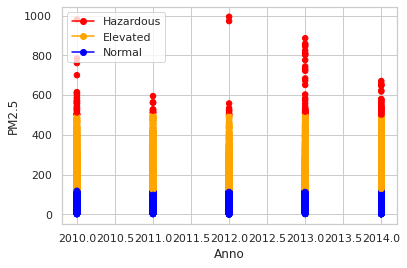

In [251]:
asignar=[]
lista1=[]
lista2=[]
lista3=[]
for index, row in not_na.iterrows():
    if(row['pm2.5'] > 500):
        asignar.append(colores[1])
        lista1.append
    else:
      if((row["pm2.5"] > 120) & (row["pm2.5"] <= 500)):
        asignar.append(colores[2])
        lista2.append
      else:
        asignar.append(colores[0])
        lista3.append
    
plt.scatter(X, Y, c=asignar, s=tamanios[0])
plt.xlabel('Anno')
plt.autoscale(enable=True, tight= False)
plt.ylabel('PM2.5')
plt.plot(lista1, label = "Hazardous", marker = 'o', color = "red")
plt.plot(lista2, label = "Elevated", marker = 'o', color = "orange")
plt.plot(lista3, label = "Normal", marker = 'o', color = "blue")
plt.legend()
plt.show()

## 6. Organización Ascendente de Datos Por Año

In [ ]:
by_year = not_na.groupby(['year']).mean()
by_year.head()

In [ ]:
by_year.sort_values(by=['pm2.5'],ascending=True)

,month,day,hour,pm2.5,TEMP
year,,,,,
2012,6.452200,15.471248,11.506088,90.545871,12.109946
2014,6.505715,15.729708,11.504676,97.734557,13.709156
2011,6.601096,15.966633,11.509836,99.071340,12.407869
2013,6.517516,15.674464,11.497580,101.712376,12.383614
2010,6.494747,15.590656,11.493511,104.045730,11.313805
